In [1]:
!pip install numpy pandas matplotlib seaborn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
AB_data = pd.read_csv('/content/AB_NYC_2019.csv')

In [4]:
AB_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
AB_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
AB_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
AB_data = AB_data.dropna(subset=['name', 'host_name'])

In [41]:
AB_data_select = AB_data[[ 'id', 'neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'availability_365']]

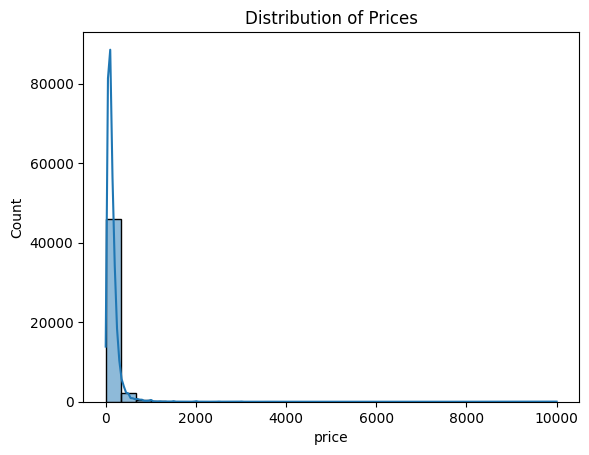

In [42]:
sns.histplot(AB_data_select['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

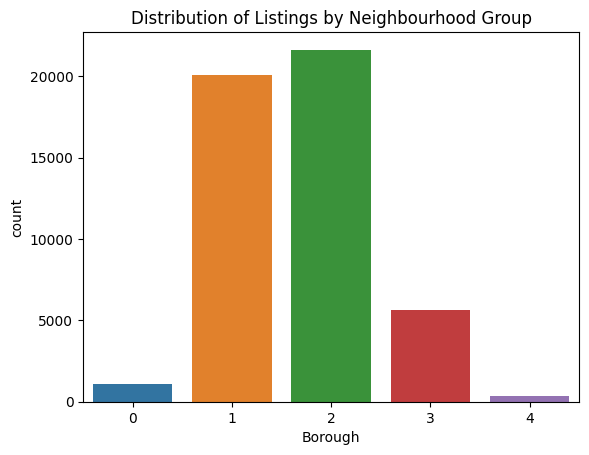

In [43]:
sns.countplot(x='neighbourhood_group', data=AB_data_select)
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Borough')
plt.show()

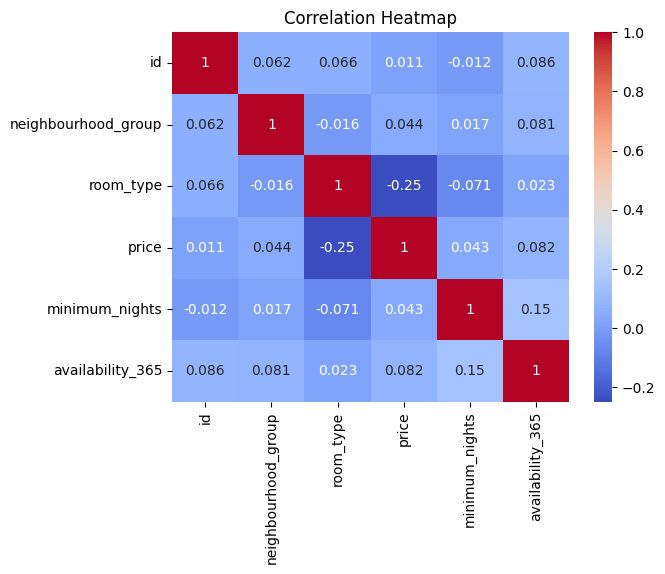

In [44]:
correlation_matrix = AB_data_select.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

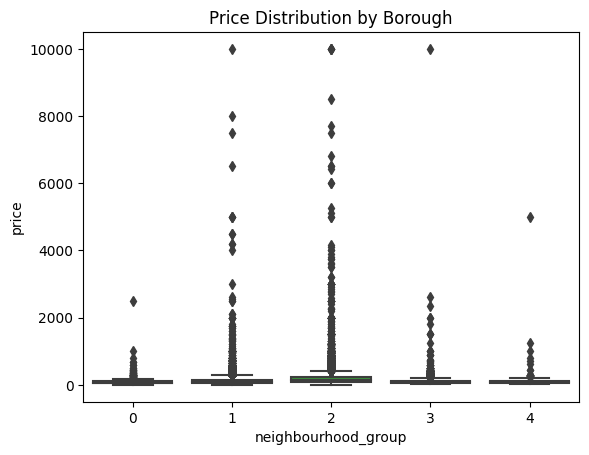

In [45]:
sns.boxplot(x='neighbourhood_group', y='price', data=AB_data_select)
plt.title('Price Distribution by Borough')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

#Encode
label_encoder = LabelEncoder()
AB_data_select['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select['neighbourhood_group'])
AB_data_select['room_type'] = label_encoder.fit_transform(AB_data_select['room_type'])

<ipython-input-46-3d230932bdc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select['neighbourhood_group'])
<ipython-input-46-3d230932bdc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select['room_type'] = label_encoder.fit_transform(AB_data_select['room_type'])


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

X = AB_data_select.drop('price', axis=1)
y = AB_data_select['price']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
#Make predictions
predictions = model.predict(X_test)

#Evaluate the model with RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 225.7133246929061


Next Attempt with new parameters set and new data selected

In [66]:
AB_data_select2 = AB_data[[ 'id', 'neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'neighbourhood']]

In [67]:
label_encoder = LabelEncoder()
AB_data_select2['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select2['neighbourhood_group'])
AB_data_select2['neighbourhood'] = label_encoder.fit_transform(AB_data_select2['neighbourhood'])
AB_data_select2['room_type'] = label_encoder.fit_transform(AB_data_select2['room_type'])

<ipython-input-67-0a3d67bf9f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select2['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select2['neighbourhood_group'])
<ipython-input-67-0a3d67bf9f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select2['neighbourhood'] = label_encoder.fit_transform(AB_data_select2['neighbourhood'])
<ipython-input-67-0a3d67bf9f8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [68]:
X2 = AB_data_select2.drop('price', axis=1)
y2 = AB_data_select2['price']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [73]:
#Create the model
model = RandomForestRegressor(n_estimators=150, random_state=42)

#Train the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [74]:
#Make predictions
predictions = model.predict(X_test)

#Evaluate the model with RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 225.607118313429


3rd Attempt with new parameters set and new data selected

In [107]:
AB_data_select3 = AB_data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]

In [108]:
label_encoder = LabelEncoder()
AB_data_select3['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select3['neighbourhood_group'])
AB_data_select3['neighbourhood'] = label_encoder.fit_transform(AB_data_select3['neighbourhood'])
AB_data_select3['room_type'] = label_encoder.fit_transform(AB_data_select3['room_type'])

<ipython-input-108-5063d00b05f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select3['neighbourhood_group'] = label_encoder.fit_transform(AB_data_select3['neighbourhood_group'])
<ipython-input-108-5063d00b05f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data_select3['neighbourhood'] = label_encoder.fit_transform(AB_data_select3['neighbourhood'])
<ipython-input-108-5063d00b05f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [109]:
X3 = AB_data_select3.drop('price', axis=1)
y3 = AB_data_select3['price']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [110]:
#Create the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

#Train the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [111]:
#Make predictions
predictions = model.predict(X_test)

#Evaluate the model with RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 211.43557195163154
